In [ ]:
# Full raw data file found at https://open.toronto.ca/dataset/reducing-single-use-and-takeaway-items/ as "Reducing Single Use and Takeaway Items - Consultation 1.xlsx"
# Raw data file uploaded as a truncated .csv of full .xlsx containing only identifier columns and response to the question:  "4. How likely would you be to use an alternative reusable item instead of the disposable option?"

# load libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# import data csv into a pandas dataframe
vis1_filepath = "C:/Users/Karen/Desktop/DSI/visualization/02_activities/assignments/assignment_3/Reducing Single Use and Takeaway Items - Consultation 1_processed.csv"
raw_df = pd.read_csv(vis1_filepath)


In [ ]:
# Process raw data into a pandas dataframe for plotting

# rename columns
raw_df.columns = ['Government',
                  'Retail',
                  'Restaurant',
                  'Environmental organization',
                  'Health organization',
                  'Waste management',
                  'Manufacturer of single-use items',
                  'None of the above',
                  'Response']

# change NaN values to False, and values that are not NaN or null to True for the first 8 columns (identifier columns)
processed_df = raw_df.iloc[:, :8].notnull()

# choose only rows were only 1 identifier was chosen (within first 8 columns, only 1 True -- aka sum = 1)
processed_df = processed_df[processed_df.iloc[:, :8].sum(axis=1) == 1]

# collapse all identifiers into a category column called ID, then append response column from raw_df (axis=1 specifies to add as new columns)
processed_df = pd.concat([processed_df.idxmax(1).to_frame('ID'), raw_df.iloc[:, 8:]], axis=1)

# summarize counts of each response by ID into new df, pivoting the indexed column (i.e. expanding into individual columns per level)
df_plot = processed_df.groupby(["ID", "Response"]).size().unstack(fill_value=0)

# combine certain ID categories together

health_env_org = pd.Series(df_plot.iloc[[0,5]].sum(), name = "Health/environmental organization") # combining 'A health organization'(column 0) and 'An environmental organization' (column 5)
retail_resto = pd.Series(df_plot.iloc[[2,3]].sum(), name = "Retail/restaurant") # combining 'A restaurant'(column 2) and 'A retail store' (column 3)

# append combined categories
df_plot = pd.concat([df_plot, health_env_org.to_frame().T, retail_resto.to_frame().T])

# drop pre-combined categories
df_plot = df_plot.drop(["Health organization", "Environmental organization", "Retail", "Restaurant"])

# create proportions table by dividing each value by its row sum
prop = df_plot.div(df_plot.sum(axis=1), axis=0)

# reorder rows to order of original data, columns from strongly oppose to strongly support
prop = prop.reindex(columns=['Strongly oppose', 'Somewhat oppose', 'Neither support nor oppose', 'Somewhat support', "Strongly support"],
                    #index=[3,5,4,1,0,2]
                    index = ['Government',
                             'Retail/restaurant',
                             'Health/environmental organization',
                             'Waste management',
                             'Manufacturer of single-use items',
                             'None of the above']
                    )

#prop

Response,Strongly oppose,Somewhat oppose,Neither support nor oppose,Somewhat support,Strongly support
Government,0.033639,0.030581,0.033639,0.159021,0.743119
Retail/restaurant,0.028777,0.018499,0.031860,0.127441,0.793422
Health/environmental organization,0.042365,0.023645,0.023645,0.118227,0.792118
Waste management,0.000000,0.040000,0.040000,0.200000,0.720000
Manufacturer of single-use items,0.136364,0.045455,0.090909,0.136364,0.590909
None of the above,0.027339,0.028837,0.029149,0.136820,0.777854


In [128]:
prop.shape[1]

5

<Figure size 3000x1500 with 0 Axes>

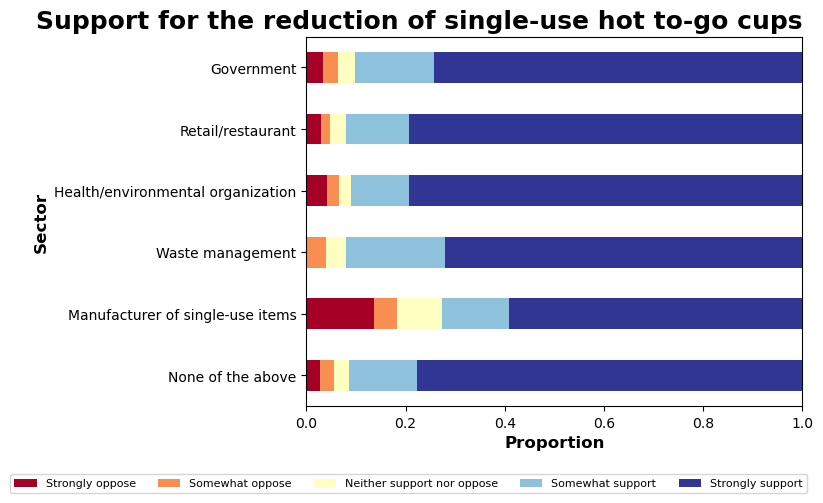

In [224]:
# create stacked bar plot with matplotlib

# initiate figure
fig = plt.figure(figsize=(30, 15))

# create stacked bar plot
ax = prop.plot(kind='barh', stacked=True, 
               color = plt.colormaps['RdYlBu'](np.linspace(0, 1, prop.shape[1])) # choose colors from red to green color gradient
               )

# invert y axis
ax.invert_yaxis()

# limit x axis range to 0 to 1
plt.xlim(0, 1)

# add title and axes titles and tick aesthetics
plt.xlabel('Proportion', fontdict={'fontsize':12, 'weight': 'bold'})
plt.ylabel('Sector', fontdict={'fontsize':12, 'weight': 'bold'})
plt.title('Support for the reduction of single-use hot to-go cups', 
          loc = 'right', 
          fontdict={'fontsize': 18, 'weight': 'bold'})

plt.legend(loc = 'lower right',
           bbox_to_anchor=(1.02, -0.25),
           ncol = 5,
           frameon = True,
           prop={'size': 8}
           #title = 'Response',
           #title_fontsize = 12
           )


# export viz
plt.savefig("vis1.png", dpi = 300, bbox_inches='tight')

plt.show()
